In [1]:
import face_recognition
import os
import cv2
import numpy as np

In [2]:
KNOWN_FACES_DIR= '/vagrant/face_recognition/facebook/friends'

In [118]:
name='MdjYoucef94'
#list of dictionary of each face encodings, face locations and image
encodings=[]
for filename in os.listdir(f'{KNOWN_FACES_DIR}/{name}'):
    # Load an image
    image = face_recognition.load_image_file(f'{KNOWN_FACES_DIR}/{name}/{filename}')
    #get face locations
    face_locations=face_recognition.face_locations(image,model='cnn')
    #print(len(face_locations))
    #no face detected in image
    if len(face_locations)!=0:
        #only one face detected
        if len(face_locations)==1:
             # Get 128-dimension of face encoding in the image
            face_encodings=face_recognition.face_encodings(image,face_locations)
            encodings.append({'image':image,'face_locations':face_locations,'face_encodings':face_encodings})
        else:
            #if more than one face in the image , get each face encoding separately in list
            #print(face_locations)
            for face_location in face_locations:
                #face_encodings function requires the face_location in list
                face_location=[face_location]
                # Get 128-dimension of face encoding in the image
                face_encodings=face_recognition.face_encodings(image,face_location)
                encodings.append({'image':image,'face_locations':face_location,'face_encodings':face_encodings})


In [119]:
len(encodings),encodings

(12,
 [{'face_encodings': [array([-0.02805741,  0.06880351,  0.0916783 , -0.0684882 , -0.16301346,
            0.00408967, -0.06524985, -0.05949159,  0.1791808 , -0.12345264,
            0.18042165,  0.04266868, -0.23451246,  0.05286923, -0.01691769,
            0.05834254, -0.14470339, -0.14599298, -0.1278187 , -0.08555317,
           -0.04390457,  0.15091129,  0.02213091,  0.03648407, -0.11046716,
           -0.3718259 , -0.11471362, -0.09997982,  0.0694257 , -0.08037914,
           -0.01070778,  0.00475753, -0.152261  , -0.01386864,  0.07384077,
            0.01071433, -0.06574079, -0.0444928 ,  0.18833341,  0.08189609,
           -0.12451662,  0.05895152,  0.03921169,  0.27199632,  0.20897144,
            0.05020935,  0.02302285, -0.08545774,  0.0919351 , -0.2824896 ,
            0.12875015,  0.16083349,  0.12888622,  0.05469045,  0.20105822,
           -0.18652745, -0.04387406,  0.13704616, -0.16563916,  0.16425765,
            0.0185135 , -0.00345672, -0.10459127, -0.06708763,  0

In [120]:
face_encoding_list=[]
for encoding in encodings:
    #get face_encodings from encoding dictionary
    face_encoding_list.append(encoding['face_encodings'][0])
#add each face encoding to the array
face_encodings=np.array(face_encoding_list)

In [121]:
face_encodings.shape

(12, 128)

In [122]:
face_encodings

array([[-0.02805741,  0.06880351,  0.0916783 , ..., -0.08286531,
        -0.01432322,  0.01534563],
       [ 0.01412996,  0.05953179,  0.08761636, ..., -0.03050694,
        -0.02828015,  0.00996265],
       [-0.04999668,  0.14413814,  0.02632527, ...,  0.02665696,
        -0.01625099,  0.04411925],
       ...,
       [-0.09402761,  0.08950578, -0.027626  , ...,  0.00551054,
         0.0825661 ,  0.13428524],
       [-0.05287394,  0.08105478,  0.06374006, ..., -0.03089928,
         0.04853079, -0.01305149],
       [-0.04842093,  0.07024411,  0.04211807, ...,  0.02405748,
         0.02553455,  0.01659152]])

In [123]:
#clustering similar faces with DBSCAN

In [124]:
from sklearn.cluster import DBSCAN
from imutils import build_montages

In [233]:
# cluster the embeddings
#eps is the maximum distance between 2 samples to form the cluster
clt = DBSCAN(metric="euclidean",eps=0.67)
clt.fit(face_encodings)

DBSCAN(eps=0.67)

In [234]:
len(clt.labels_),clt.labels_

(12, array([ 0,  0, -1, -1, -1,  0, -1, -1,  0,  0,  0,  0]))

In [235]:
labelIDs=np.unique(clt.labels_)
labelIDs

array([-1,  0])

In [236]:
# total number of unique faces found in the directory
labelIDs = np.unique(clt.labels_)
#labelid -1 is the outlier faces (not to be considered)
numUniqueFaces = len(np.where(labelIDs > -1)[0])
print(f"unique faces: {numUniqueFaces}")

unique faces: 1


In [237]:
from collections import Counter
#count the number of unique labels
counts=Counter(clt.labels_)
#remove outlier face
counts[-1]=0
#get most common face label
most_common_label=counts.most_common(1)[0]
most_common_label

(0, 7)

In [238]:
#get the index of most common faces
idxs = np.where(clt.labels_ == most_common_label[0])[0]
faces=[]
common_face_encodings=[]
for i in idxs:
    # get the image from the index of the encodings dict
    image=encodings[i]['image']
    common_face_encodings.append(encodings[i]['face_encodings'][0])
    #get the face locations
    (top, right, bottom, left) = encodings[i]['face_locations'][0]
    face = image[top:bottom, left:right]
    # force resize the face ROI to 96x96 and then add it to the
    # faces montage list
    face = cv2.resize(face, (96, 96))
    faces.append(face)

In [239]:
len(faces),faces

(7, [array([[[110,  77,  58],
          [114,  81,  62],
          [110,  78,  58],
          ...,
          [185, 135, 121],
          [168, 126, 113],
          [131,  96,  84]],
  
         [[120,  85,  65],
          [116,  83,  61],
          [118,  85,  64],
          ...,
          [187, 135, 121],
          [185, 140, 126],
          [168, 129, 118]],
  
         [[141, 106,  85],
          [135, 100,  78],
          [139, 104,  82],
          ...,
          [185, 131, 118],
          [184, 137, 124],
          [179, 137, 126]],
  
         ...,
  
         [[ 22,  18,  19],
          [ 23,  19,  20],
          [ 24,  20,  21],
          ...,
          [ 12,   8,   8],
          [ 23,  21,  21],
          [ 25,  23,  25]],
  
         [[ 18,  14,  15],
          [ 22,  18,  19],
          [ 25,  21,  22],
          ...,
          [ 12,   8,   8],
          [ 22,  19,  20],
          [ 20,  19,  21]],
  
         [[ 17,  13,  12],
          [ 17,  13,  13],
          [ 20,  16, 

In [247]:
faces2=[]
faces2.append(faces[0])
faces2.append(faces[1])
faces2.append(faces[5])
faces2.append(faces[6])

In [248]:
import math
box_montage=round(math.sqrt(len(faces)))
montage = build_montages(faces2, (96, 96), (box_montage, box_montage))[0]

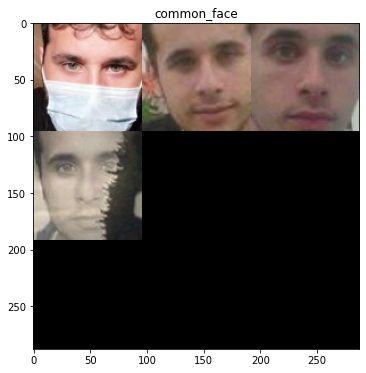

In [249]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,6))
plt.imshow(montage)
plt.title('common_face')
plt.show()

In [68]:
'''cv2.imshow('common_face', montage)
cv2.waitKey(0)
cv2.destroyAllWindows()'''

"cv2.imshow('common_face', montage)\ncv2.waitKey(0)\ncv2.destroyAllWindows()"

In [69]:
#get centroid of the most common face embedding
common_face_encodings

[array([-0.11572714,  0.03371276,  0.03648519, -0.06466679,  0.00758471,
        -0.02691732, -0.04407685, -0.11821515,  0.14942235, -0.09162893,
         0.23645702,  0.0290327 , -0.12533271, -0.20995687, -0.02529655,
         0.06619948, -0.10488976, -0.13940933, -0.07236801, -0.01465159,
         0.07746096, -0.04548629,  0.06406119,  0.02702558, -0.22122988,
        -0.34257483, -0.08346816, -0.10839853,  0.03892039, -0.11329504,
        -0.00436711, -0.01239184, -0.21761824, -0.04451879, -0.00066893,
         0.08447206, -0.02103122,  0.00165251,  0.16170509, -0.00799267,
        -0.19469146, -0.00547421,  0.01562934,  0.21448804,  0.24146692,
         0.02717276,  0.04106054, -0.11922461,  0.14480814, -0.15892157,
         0.06786307,  0.08641636,  0.1387932 ,  0.01943284,  0.08387426,
        -0.07382561, -0.00316304,  0.11501211, -0.19907416,  0.04106501,
        -0.02283537, -0.01038871, -0.08810094, -0.01722808,  0.15295348,
         0.0749585 , -0.13384248, -0.1611602 ,  0.1